In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3
import pandas as pd
import numpy as np
from sklearn import decomposition
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans

**Understand the data**

In [ ]:
count_pt = 0
for name in os.listdir('/content/drive/MyDrive/Data/data_mini_projet/CSV'):
    if 'Pt' in name:
      if '_01.csv' in name :
        count_pt += 1
files = []
for name in os.listdir('/content/drive/MyDrive/Data/data_mini_projet/CSV'):
    if 'Pt' in name:
      if '_01.csv'in name :
        files.append('/content/drive/MyDrive/Data/data_mini_projet/CSV/' + name)

count_co = 0
for name in os.listdir('/content/drive/MyDrive/Data/data_mini_projet/CSV'):
    if 'Co' in name:
      if '_01.csv' in name :
        count_co += 1
files = []
for name in os.listdir('/content/drive/MyDrive/Data/data_mini_projet/CSV'):
    if 'Co' in name:
      if '_01.csv'in name :
        files.append('/content/drive/MyDrive/Data/data_mini_projet/CSV/' + name)
    
print("People with PD : ", count_pt)
print("Healthy people : ", count_co)



People with PD :  93
Healthy people :  72


In [ ]:
df_co = pd.read_csv('/content/drive/MyDrive/Data/data_mini_projet/CSV/JuCo01_01.csv')  # 83 kg
df_pt = pd.read_csv('/content/drive/MyDrive/Data/data_mini_projet/CSV/JuPt01_01.csv')  # 50 kg or 82 kg depend de GaPt03_01.csv or GaPt06_01.csv

In [ ]:
df_co

,Time(sec),VGRF_left_s1,VGRF_left_s2,VGRF_left_s3,VGRF_left_s4,VGRF_left_s5,VGRF_left_s6,VGRF_left_s7,VGRF_left_s8,VGRF_right_s1,VGRF_right_s2,VGRF_right_s3,VGRF_right_s4,VGRF_right_s5,VGRF_right_s6,VGRF_right_s7,VGRF_right_s8,Total_force_left,Total_force_right
0,0.0100,199.10,87.34,91.08,24.09,21.12,87.67,87.23,64.57,163.90,79.86,112.42,50.82,13.75,102.74,144.98,79.53,662.20,748.00
1,0.0200,199.10,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.90,79.86,112.42,50.82,13.75,102.74,144.98,79.53,660.22,748.00
2,0.0300,199.10,87.34,91.08,24.09,21.12,87.67,89.10,64.57,163.90,77.55,112.42,48.07,13.75,105.49,144.98,79.53,664.07,745.69
3,0.0400,199.10,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.90,77.55,112.42,50.82,13.75,105.49,144.98,79.53,660.22,748.44
4,0.0500,199.10,87.34,91.08,24.09,19.03,87.67,89.10,62.59,163.90,77.55,112.42,50.82,13.75,102.74,144.98,79.53,660.00,745.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12113,121.1315,305.91,85.14,58.08,0.00,0.00,0.00,0.00,0.00,15.73,11.66,4.73,33.88,33.00,255.42,432.19,147.29,449.13,933.90
12114,121.1415,331.54,134.75,79.31,11.99,0.00,3.85,0.00,0.00,15.73,9.35,4.73,11.22,24.75,230.34,420.42,151.80,561.44,868.34
12115,121.1515,352.44,181.94,102.96,39.60,0.00,17.49,2.97,0.00,13.97,9.35,4.73,5.61,19.25,192.39,402.82,154.00,697.40,802.12
12116,121.1615,352.44,202.40,124.74,43.01,8.47,50.71,7.59,0.00,13.97,6.93,0.00,0.00,13.75,143.66,373.34,151.80,789.36,703.45


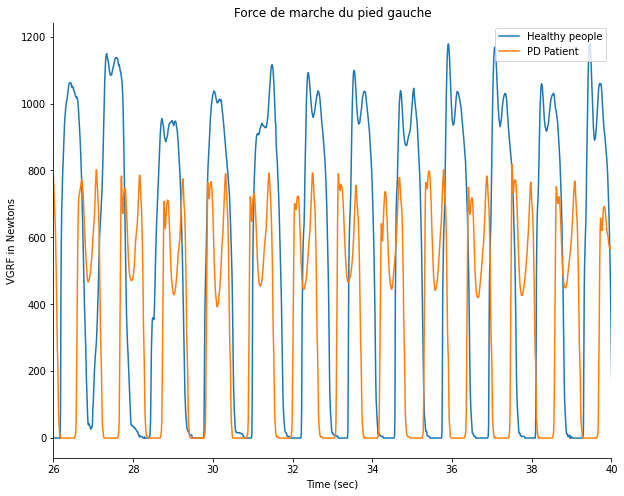

In [ ]:
fig = plt.figure(figsize=(10, 8))
plt.plot(df_co['Time(sec)'], df_co['Total_force_left'], label="Healthy people")
plt.plot(df_pt['Time(sec)'], df_pt['Total_force_left'], label="PD Patient")
plt.legend(loc=1)
plt.xlim(26,40)
plt.xlabel("Time (sec)")
plt.ylabel("VGRF in Newtons")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Force de marche du pied gauche")
plt.savefig("Force de marche du pied gauche.png")

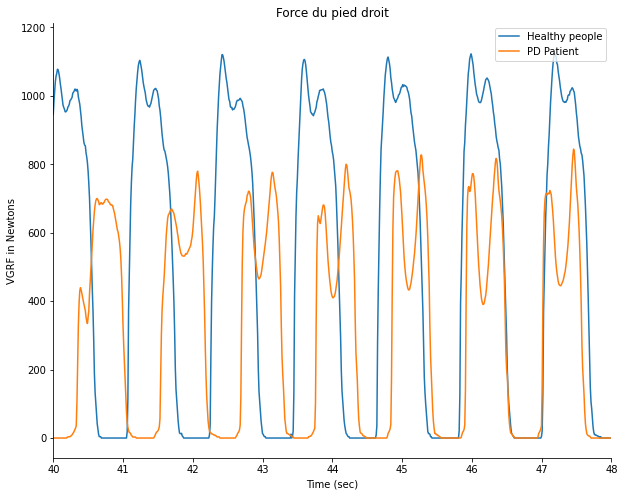

In [ ]:
fig2 = plt.figure(figsize=(10, 8))
plt.plot(df_co['Time(sec)'], df_co['Total_force_right'], label="Healthy people" )
plt.plot(df_pt['Time(sec)'], df_pt['Total_force_right'], label = "PD Patient")
plt.legend(loc=1)
plt.xlim(40,48)
plt.xlabel("Time (sec)")
plt.ylabel("VGRF in Newtons")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Force du pied droit")
plt.savefig("Force de marche du pied droit.png")

In [ ]:
count = 0
for name in os.listdir('/content/drive/MyDrive/Data/data_mini_projet/CSV'):
    if 'GaCo' in name:
      if '_01.csv' in name :
        count += 1
files = []
for name in os.listdir('/content/drive/MyDrive/Data/data_mini_projet/CSV'):
    if 'GaCo' in name:
      if '_01.csv' in name :
        files.append('/content/drive/MyDrive/Data/data_mini_projet/CSV/' + name)
print(files)
i = 0
path = '/content/drive/MyDrive/Data/data_mini_projet/Combined Datasets/Co_final.csv'
with open(path, 'a') as outfile:
    for fname in files:
        with open(fname) as infile:
        
            if i == 0: 
                for line in infile:
                    outfile.write(line)
            else:
                next(infile)
                for line in infile:
                    outfile.write(line)
            i += 1
            print('{} of {} files completed'.format(i, count))

In [ ]:
count = 0
for name in os.listdir('/content/drive/MyDrive/Data/data_mini_projet/CSV'):
    if 'Pt' in name:
        count += 1
files = []
for name in os.listdir('/content/drive/MyDrive/Data/data_mini_projet/CSV'):
    if 'Pt' in name:
        files.append('/content/drive/MyDrive/Data/data_mini_projet/CSV/' + name)
print(files)
i = 0
path = '/content/drive/MyDrive/Data/data_mini_projet/Combined Datasets/Pt_final.csv'
with open(path, 'a') as outfile:
    for fname in files:
        with open(fname) as infile:
        
            if i == 0: 
                for line in infile:
                    outfile.write(line)
            else:
                next(infile)
                for line in infile:
                    outfile.write(line)
            i += 1
            print('{} of {} files completed'.format(i, count))

In [ ]:
ds_co = pd.read_csv('/content/drive/MyDrive/Data/data_mini_projet/Combined Datasets/Co_final.csv')
ds_pt = pd.read_csv('/content/drive/MyDrive/Data/data_mini_projet/Combined Datasets/Pt_final.csv')

In [ ]:
ds_co.shape

(1012740, 19)

In [ ]:
# poly = PolynomialFeatures(degree=2)
# ds_co_poly = poly.fit_transform(ds_co)
# ds_pt_poly = poly.fit_transform(ds_pt)
ds_co_poly = ds_co
ds_pt_poly = ds_pt

In [ ]:
ds_co = ds_co.iloc[:, 1:-2]
ds_pt = ds_pt.iloc[:, 1:-2]

In [ ]:
#poly.get_feature_names(ds_co.columns)[150]

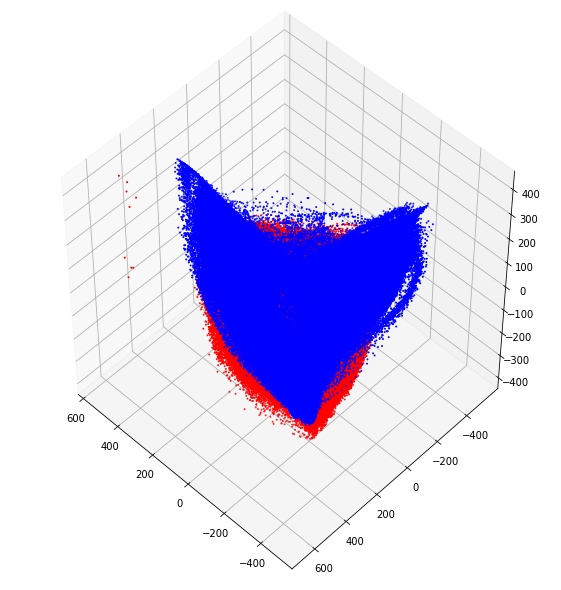

In [ ]:
fig = plt.figure(figsize=(8,8))

subaxes1 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
pca = decomposition.PCA(n_components=3)
ds_co_poly_pca2 = pca.fit_transform(ds_co_poly)
ds_pt_poly_pca2 = pca.fit_transform(ds_pt_poly)

subaxes1.scatter(ds_co_poly_pca2[:, 0], ds_co_poly_pca2[:, 1], ds_co_poly_pca2[:, 2],  c='blue' ,s=1)
subaxes1.scatter(ds_pt_poly_pca2[:, 0], ds_pt_poly_pca2[:, 1], ds_pt_poly_pca2[:, 2],  c='red' ,s=1)

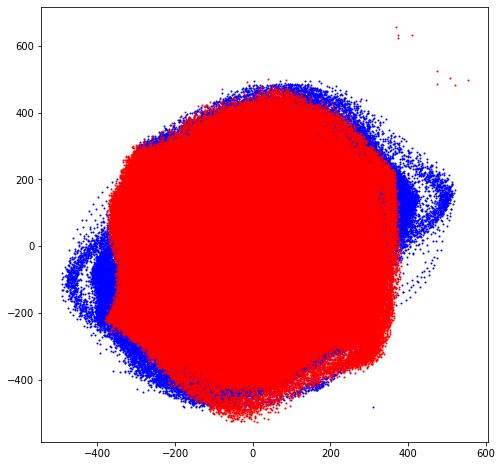

In [ ]:
fig1, subaxes = plt.subplots(1, 1, figsize=(8,8))

pca1 = decomposition.PCA(n_components=2)
ds_co_poly_pca = pca1.fit_transform(ds_co_poly)
ds_pt_poly_pca = pca1.fit_transform(ds_pt_poly)
# ds_co_poly_pca = pca.transform(ds_co_poly)
subaxes.scatter(ds_co_poly_pca[:, 0], ds_co_poly_pca[:, 1],  c='blue' ,s=1)
subaxes.scatter(ds_pt_poly_pca[:, 0], ds_pt_poly_pca[:, 1],  c='red' ,s=1)

In [ ]:
count = 0
for name in os.listdir('/content/drive/MyDrive/Data/data_mini_projet/CSV'):
    if 'SiCo' in name:
      if '_01.csv' in name :
        count += 1
files = []
for name in os.listdir('/content/drive/MyDrive/Data/data_mini_projet/CSV'):
    if 'SiCo' in name:
      if '_01.csv' in name :
        files.append('/content/drive/MyDrive/Data/data_mini_projet/CSV/' + name)
    
#path = '/content/drive/MyDrive/Data/data_mini_projet/Combined Datasets/Co_final.csv'
i = 0
j = 0
df2 = pd.DataFrame()
for fname in files:
    global df, df2
        
    df = pd.read_csv(fname)
    for col in df.columns:
        for x in ["Min", "Max", "Std", "Med", "Avg", "Skewness", "Kurtosis"]:
            colname = col + x
            if x == 'Min':
                df2.loc[i, colname] = df[col].min(axis=0)
                
            if x == 'Max':
                df2.loc[i, colname] = df[col].max(axis=0)
                
            if x == 'Std':
                df2.loc[i, colname] = df[col].std(axis=0)
                
            if x == 'Med':
                df2.loc[i, colname] = df[col].median(axis=0)
                
            if x == 'Avg':
                df2.loc[i, colname] = df[col].mean(axis=0)
            if x == 'Skewness':
                df2.loc[i, colname] = df[col].skew(axis=0)
                
            if x == 'Kurtosis':
                df2.loc[i, colname] = df[col].kurtosis(axis=0)
    i += 1
    j += 1
    print("{} files completed out of {}".format(j, count))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


1 files completed out of 29
2 files completed out of 29
3 files completed out of 29
4 files completed out of 29
5 files completed out of 29
6 files completed out of 29
7 files completed out of 29
8 files completed out of 29
9 files completed out of 29
10 files completed out of 29
11 files completed out of 29
12 files completed out of 29
13 files completed out of 29
14 files completed out of 29
15 files completed out of 29
16 files completed out of 29
17 files completed out of 29
18 files completed out of 29
19 files completed out of 29
20 files completed out of 29
21 files completed out of 29
22 files completed out of 29
23 files completed out of 29
24 files completed out of 29
25 files completed out of 29
26 files completed out of 29
27 files completed out of 29
28 files completed out of 29
29 files completed out of 29


In [ ]:
df2 = df2.dropna(thresh=50)

In [ ]:
df.shape

In [ ]:
df2.shape

(25, 133)

In [ ]:
count = 0

for name in os.listdir('/content/drive/MyDrive/Data/data_mini_projet/CSV'):
    if 'SiPt' in name:
      if '_01.csv' in name :
        count += 1
files = []
for name in os.listdir('/content/drive/MyDrive/Data/data_mini_projet/CSV'):
    if 'SiPt' in name:
      if '_01.csv' in name :
        files.append('/content/drive/MyDrive/Data/data_mini_projet/CSV/' + name)
i = 0
j = 0
df4 = pd.DataFrame()
for fname in files:
    global df3, df4
    df3 = pd.read_csv(fname)
    for col in df.columns:
        for x in ["Min", "Max", "Std", "Med", "Avg", "Skewness", "Kurtosis"]:
            colname = col + x
            if x == 'Min':
                df4.loc[i, colname] = df3[col].min(axis=0)
                
            if x == 'Max':
                df4.loc[i, colname] = df3[col].max(axis=0)
                
            if x == 'Std':
                df4.loc[i, colname] = df3[col].std(axis=0)
                
            if x == 'Med':
                df4.loc[i, colname] = df3[col].median(axis=0)
                
            if x == 'Avg':
                df4.loc[i, colname] = df3[col].mean(axis=0)
            if x == 'Skewness':
                df4.loc[i, colname] = df3[col].skew(axis=0)
                
            if x == 'Kurtosis':
                df4.loc[i, colname] = df3[col].kurtosis(axis=0)
    i += 1
    j += 1
    print("{} files completed out of {}".format(j, count))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


1 files completed out of 35
2 files completed out of 35
3 files completed out of 35
4 files completed out of 35
5 files completed out of 35
6 files completed out of 35
7 files completed out of 35
8 files completed out of 35
9 files completed out of 35
10 files completed out of 35
11 files completed out of 35
12 files completed out of 35
13 files completed out of 35
14 files completed out of 35
15 files completed out of 35
16 files completed out of 35
17 files completed out of 35
18 files completed out of 35
19 files completed out of 35
20 files completed out of 35
21 files completed out of 35
22 files completed out of 35
23 files completed out of 35
24 files completed out of 35
25 files completed out of 35
26 files completed out of 35
27 files completed out of 35
28 files completed out of 35
29 files completed out of 35
30 files completed out of 35
31 files completed out of 35
32 files completed out of 35
33 files completed out of 35
34 files completed out of 35
35 files completed out 

In [ ]:
df4 = df4.dropna(thresh=50)

In [ ]:
df3.shape

(12118, 19)

In [ ]:
df4.shape

(35, 133)

In [3]:
df2.to_csv('/content/drive/MyDrive/Data/data_mini_projet/Transformed Data/Si/Transformed_Co.csv')
df4.to_csv('/content/drive/MyDrive/Data/data_mini_projet/Transformed Data/Si/Transformed_Pt.csv')

NameError: ignored

KNN algotithme


In [4]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
import os
import scipy.stats as sc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df_co = pd.read_csv('/content/drive/MyDrive/Data/data_mini_projet/Transformed Data/Transformed_Co.csv', index_col = 0)
df_pt = pd.read_csv('/content/drive/MyDrive/Data/data_mini_projet/Transformed Data/Transformed_Pt.csv' , index_col = 0)

In [6]:
print(df_co.shape, df_pt.shape)

(92, 133) (214, 133)


In [7]:
df_co.head()

,Time(sec)Min,Time(sec)Max,Time(sec)Std,Time(sec)Med,Time(sec)Avg,Time(sec)Skewness,Time(sec)Kurtosis,VGRF_left_s1Min,VGRF_left_s1Max,VGRF_left_s1Std,VGRF_left_s1Med,VGRF_left_s1Avg,VGRF_left_s1Skewness,VGRF_left_s1Kurtosis,VGRF_left_s2Min,VGRF_left_s2Max,VGRF_left_s2Std,VGRF_left_s2Med,VGRF_left_s2Avg,VGRF_left_s2Skewness,VGRF_left_s2Kurtosis,VGRF_left_s3Min,VGRF_left_s3Max,VGRF_left_s3Std,VGRF_left_s3Med,VGRF_left_s3Avg,VGRF_left_s3Skewness,VGRF_left_s3Kurtosis,VGRF_left_s4Min,VGRF_left_s4Max,VGRF_left_s4Std,VGRF_left_s4Med,VGRF_left_s4Avg,VGRF_left_s4Skewness,VGRF_left_s4Kurtosis,VGRF_left_s5Min,VGRF_left_s5Max,VGRF_left_s5Std,VGRF_left_s5Med,VGRF_left_s5Avg,...,VGRF_right_s5Std,VGRF_right_s5Med,VGRF_right_s5Avg,VGRF_right_s5Skewness,VGRF_right_s5Kurtosis,VGRF_right_s6Min,VGRF_right_s6Max,VGRF_right_s6Std,VGRF_right_s6Med,VGRF_right_s6Avg,VGRF_right_s6Skewness,VGRF_right_s6Kurtosis,VGRF_right_s7Min,VGRF_right_s7Max,VGRF_right_s7Std,VGRF_right_s7Med,VGRF_right_s7Avg,VGRF_right_s7Skewness,VGRF_right_s7Kurtosis,VGRF_right_s8Min,VGRF_right_s8Max,VGRF_right_s8Std,VGRF_right_s8Med,VGRF_right_s8Avg,VGRF_right_s8Skewness,VGRF_right_s8Kurtosis,Total_force_leftMin,Total_force_leftMax,Total_force_leftStd,Total_force_leftMed,Total_force_leftAvg,Total_force_leftSkewness,Total_force_leftKurtosis,Total_force_rightMin,Total_force_rightMax,Total_force_rightStd,Total_force_rightMed,Total_force_rightAvg,Total_force_rightSkewness,Total_force_rightKurtosis
0,0.01,121.1715,34.980647,60.5908,60.590759,4.291654e-09,-1.2,0.0,481.03,130.051703,4.07,85.809068,1.278122,0.126722,0.0,325.27,92.488817,3.74,59.333853,1.431718,0.692904,0.0,179.96,42.796370,0.00,26.572453,1.545594,1.262747,0.0,263.01,55.475204,8.36,44.805583,0.860795,-0.548052,0.0,90.86,16.013010,0.00,10.620710,...,11.433343,4.18,8.658211,1.460261,1.936446,0.0,335.72,82.293723,27.72,68.492401,0.945940,-0.295144,0.0,333.74,76.490472,10.01,53.511305,1.412047,0.835374,0.0,226.93,57.155223,25.08,46.602111,0.970262,-0.440245,0.0,1133.77,363.118311,461.945,390.228313,0.103051,-1.618405,0.0,1084.60,361.122630,460.405,389.842396,0.088368,-1.646734
1,0.01,84.6141,24.427423,42.3120,42.312038,1.173240e-08,-1.2,0.0,524.81,140.032952,15.29,97.749078,1.210574,-0.045800,0.0,157.08,39.760822,6.38,28.689279,1.186100,-0.078274,0.0,196.57,55.959519,6.38,40.079609,1.131639,-0.278239,0.0,253.44,41.130332,6.16,31.839878,1.453757,2.122754,0.0,37.18,10.011463,3.85,8.330401,...,10.191768,7.70,9.534733,0.630374,-0.837302,0.0,170.17,48.153019,27.83,40.613178,1.079264,-0.119989,0.0,275.44,76.808297,36.52,65.149963,0.965916,-0.355866,0.0,158.18,50.398512,12.21,36.688211,1.221753,-0.039554,0.0,850.30,315.910086,486.805,377.826276,-0.134118,-1.731710,0.0,799.70,314.541793,443.905,362.306657,-0.094478,-1.810599
2,0.01,121.1715,34.980647,60.5908,60.590759,4.291654e-09,-1.2,0.0,371.36,114.477248,20.57,100.557020,0.547648,-1.370951,0.0,232.54,82.972138,14.52,73.859590,0.494517,-1.481582,0.0,251.02,81.800134,13.75,72.792686,0.493290,-1.452088,0.0,176.22,42.249218,27.17,38.786192,0.759801,-0.566008,0.0,88.11,20.673224,12.54,18.304098,...,22.735478,13.20,21.590627,0.520700,-1.193568,0.0,250.03,66.794441,40.26,61.512276,0.717856,-0.828725,0.0,257.84,69.837041,55.11,66.944740,0.626424,-0.854909,0.0,157.08,33.353130,29.26,32.167321,0.724624,-0.443269,0.0,1031.69,395.150043,613.525,475.165742,-0.174713,-1.776554,0.0,983.62,385.406462,582.010,463.735899,-0.168923,-1.764448
3,0.01,121.1715,34.980647,60.5908,60.590759,4.291654e-09,-1.2,0.0,401.83,109.565129,10.23,81.761698,1.013077,-0.518325,0.0,261.69,79.137751,5.06,58.328594,1.032563,-0.481013,0.0,160.16,44.953729,3.85,34.484247,0.924942,-0.658915,0.0,311.85,76.114899,16.28,64.767379,0.848086,-0.469624,0.0,26.95,4.207834,2.53,3.187386,...,17.203060,7.70,13.837579,1.197904,0.531564,0.0,290.95,65.862165,32.01,53.812966,1.243087,0.622720,0.0,408.65,87.545084,38.17,69.351405,1.338011,0.870772,0.0,160.16,31.087350,10.89,21.895764,1.738934,2.175884,0.0,912.12,343.123644,512.875,401.909963

In [8]:
df_co_len = df_co.shape[0]
df_pt_len = df_pt.shape[0]

In [9]:
df_co_pca = pd.DataFrame(df_co)
df_pt_pca = pd.DataFrame(df_pt)

In [10]:
y1 = pd.Series([0]*df_co_len)
y1.shape

(92,)

In [11]:
y2 = pd.Series([1]*df_pt_len, index = range(df_co_len-1,(df_co_len + df_pt_len)-1))
y2.shape

(214,)

In [12]:
y = pd.concat([y1,y2]) 
y = y.ravel()
y.shape

(306,)

In [13]:
X = pd.concat([df_co_pca, df_pt_pca])

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
best_score = 0
for i in range(200):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train, np.ravel(y_train))

    # print('gamma = {:.2f}, C = {:.2f}, accuracy = {}'.format(this_gamma, this_C, clf.score(X_test, np.ravel(y_test))))
    grid_values = {'n_neighbors': [1, 2, 5, 10, 20, 50, 70, 100]}
    grid_clf = GridSearchCV(knn, param_grid=grid_values, scoring='roc_auc')
    grid_clf.fit(X_train, y_train1)
    # decision_fn_scores = grid_clf.decision_function(X_test)
    
    if best_score < grid_clf.best_score_:
        best_score = grid_clf.best_score_
        prediction = grid_clf.predict(X_test)
        
        
        prec = precision_score(y_test, prediction)
        rec = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        
print(best_score)

0.9411858974358974


In [15]:
print("Precision: {}".format(prec))
print("Recall: {}".format(rec))
print("F1: {}".format(f1))

Precision: 0.8431372549019608
Recall: 0.8269230769230769
F1: 0.8349514563106797


SVM

In [16]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
import os
import scipy.stats as sc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [17]:
# pca1 = decomposition.PCA(n_components=50)
# df_co_pca = pca1.fit_transform(df_co)
# df_pt_pca = pca1.fit_transform(df_pt)

df_co_pca= df_co
df_pt_pca= df_pt

In [18]:
df_co_len = df_co_pca.shape[0]
df_pt_len = df_pt_pca.shape[0]

In [19]:
df_co_pca = pd.DataFrame(df_co_pca)
df_pt_pca = pd.DataFrame(df_pt_pca)

In [20]:
X = pd.concat([df_co_pca, df_pt_pca])

In [21]:
y1 = pd.Series([0]*df_co_len)
y1.shape

(92,)

In [22]:
y2 = pd.Series([1]*df_pt_len, index = range(df_co_len-1,(df_co_len + df_pt_len)-1))
y2.shape

(214,)

In [23]:
y = pd.concat([y1,y2]) 
y.shape

(306,)

In [24]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
y_train = pd.DataFrame(y_train1)
y_test = pd.DataFrame(y_test1)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(229, 133)
(77, 133)
(229, 1)
(77, 1)


In [25]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
best_score = 0
for i in range(200):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    clf = SVC(kernel = 'linear', C = 1).fit(X_train, np.ravel(y_train))
    # print('gamma = {:.2f}, C = {:.2f}, accuracy = {}'.format(this_gamma, this_C, clf.score(X_test, np.ravel(y_test))))
    grid_vals = {'C': [0.1, 1, 5, 10, 12, 15, 20, 25, 50, 100, 250]}
    grid_clf = GridSearchCV(clf, param_grid=grid_vals, scoring='accuracy')
    grid_clf.fit(X_train, y_train1)
    decision_fn_scores = grid_clf.decision_function(X_test)
    
    if best_score < grid_clf.best_score_:
        best_score = grid_clf.best_score_
        best_params = grid_clf.best_params_
        prediction = grid_clf.predict(X_test)
        y_score = grid_clf.decision_function(X_test)
        prec = precision_score(y_test, prediction)
        rec = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        
print(best_score)
print(best_params)

0.8819323671497583
{'C': 5}


In [27]:
print('Precision: {:.4f}'.format(prec))
print('Recall: {:.4f}'.format(rec))
print('F1: {:.4f}'.format(f1))
print('AUC: {:.4f}'.format(roc_auc))

Precision: 0.8696
Recall: 0.7843
F1: 0.8247
AUC: 0.7790


RANDOM FORESTS

In [28]:
max_est = 0
max_acc = 0
curr_max_acc = 0
curr_max_est =0

for i in range (0,100):
    
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y, random_state=i)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)
    
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    
    
    
    for n in [40,50,100,150,200,250,300]:

            clf = RandomForestClassifier(n_estimators = int(n), n_jobs=3)
            clf.fit(X_train, np.ravel(y_train))
            if max_acc < clf.score(X_test, np.ravel(y_test)):
                max_acc = clf.score(X_test, np.ravel(y_test))
                max_est = n
    if(curr_max_acc < max_acc):
            curr_max_acc = max_acc
            curr_max_est = max_est
            n_rs = i
    print("{} done".format(i))
print(curr_max_acc,curr_max_est, n_rs) 
    
    
    
"""print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)"""

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
0.974025974025974 40 98


'print(X_train.shape)\nprint(X_test.shape)\nprint(y_train.shape)\nprint(y_test.shape)'

DECISION TREE

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.model_selection import GridSearchCV
best_score = 0
for i in range(200):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y)
    y_train = pd.DataFrame(y_train1)
    y_test = pd.DataFrame(y_test1)

    
    grid_values = {'max_depth': [1, 2, 4, 5, 7, 10, 15, 20, 25, 40, 60, 100]}
    grid_clf = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy')
    grid_clf.fit(X_train, y_train1)
    
    
    if best_score < grid_clf.best_score_:
        best_score = grid_clf.best_score_
        best_params = grid_clf.best_params_
        prediction = grid_clf.predict(X_test)
        
        prec = precision_score(y_test, prediction)
        rec = recall_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        
        
print(best_score)
print(best_params)

In [32]:
print('Precision: {:.4f}'.format(prec))
print('Recall: {:.4f}'.format(rec))
print('F1: {:.4f}'.format(f1))

Precision: 0.8571
Recall: 0.9796
F1: 0.9143


Gaussian NB

In [33]:
print('\n')
print('**********************************************************')
print('GaussianNB')
model = GaussianNB()
cv = KFold(n_splits=4, random_state=1, shuffle=True)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('precision: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('F1: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
y_pred = cross_val_predict(model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
print ('Confusion Matrix : ', conf_mat)



**********************************************************
GaussianNB
Accuracy: 0.709 (0.084)
precision: 0.940 (0.019)
Recall: 0.629 (0.115)
F1: 0.747 (0.076)
Confusion Matrix :  [[ 83   9]
 [ 80 134]]


Apprentissage Non supervié 

In [34]:
print('\n')
print('**********************************************************')
print('Kmeans')
from scipy.optimize import linear_sum_assignment as linear_assignment
def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)
random_state = np.random.RandomState(0)
model = KMeans(n_clusters = 2 , random_state=random_state)
model.fit(X)
pred=model.predict(X)
print('Accuracy:', accuracy_score(y,pred))
print (classification_report(y, pred))
cm=confusion_matrix(y,pred)
print ('Confusion Matrix' , cm)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]
acc= np.trace(cm2) / np.sum(cm2)
pre=cm2[0][0]/(cm2[0][0]+cm2[1][0])
rec=cm2[0][0]/(cm2[0][0]+cm2[0][1])
f=2*pre*rec/(pre+rec)
print('accuracy',acc)
print('precision',pre)
print('recall',rec)
print('f1 mesure',f)


print('\n')
print('**********************************************************')
print('GMM')
model = GMM(n_components=2 ,random_state=random_state)
model.fit(X)
pred=model.predict(X)
print('Accuracy:',  accuracy_score(y,pred))
print (classification_report(y,pred))
cm=confusion_matrix(y,pred)
print ('Confusion Matrix' , cm)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]
a= np.trace(cm2) / np.sum(cm2)
acc= np.trace(cm2) / np.sum(cm2)
acc= np.trace(cm2) / np.sum(cm2)
pre=cm2[0][0]/(cm2[0][0]+cm2[1][0])
rec=cm2[0][0]/(cm2[0][0]+cm2[0][1])
f=2*pre*rec/(pre+rec)
print('accuracy',acc)
print('precision',pre)
print('recall',rec)
print('f1 mesure',f)




**********************************************************
Kmeans
Accuracy: 0.49673202614379086
              precision    recall  f1-score   support

           0       0.28      0.41      0.33        92
           1       0.68      0.53      0.60       214

    accuracy                           0.50       306
   macro avg       0.48      0.47      0.46       306
weighted avg       0.56      0.50      0.52       306

Confusion Matrix [[ 38  54]
 [100 114]]
accuracy 0.5032679738562091
precision 0.32142857142857145
recall 0.5869565217391305
f1 mesure 0.4153846153846154


**********************************************************
GMM
Accuracy: 0.5032679738562091
              precision    recall  f1-score   support

           0       0.32      0.59      0.42        92
           1       0.72      0.47      0.57       214

    accuracy                           0.50       306
   macro avg       0.52      0.53      0.49       306
weighted avg       0.60      0.50      0.52       306

C